In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
excel_path_520_ROS = r"RealDataSource\520_withQuantity_cleaned_reduced_2.xlsx"
excel_path_520 = r"RealDataSource\520_withQuantity_cleaned_reduced_2.xlsx"

plt.rcParams['figure.figsize'] = (14, 8)  # alle Plots 14×8
plt.rcParams['figure.dpi']     = 100     # bei Bedarf höhere Auflösung

In [11]:
# 1.0 Verteilungsparameter aus den realen Daten ermitteln
df_real1 = pd.read_excel(excel_path_520_ROS)
setup_runtime_mean, setup_runtime_std = df_real1['Setup&Runtime Zeit (h)'].mean(), df_real1['Setup&Runtime Zeit (h)'].std(ddof=0)
setup_mean, setup_std = df_real1['Setup Zeit(h)'].mean(), df_real1['Setup Zeit(h)'].std(ddof=0)
run_mean, run_std = df_real1['Run Zeit(h)'].mean(), df_real1['Run Zeit(h)'].std(ddof=0)

print("Paramater der realen Daten:")
print(f"Rüst&Bearbeitungszeit:  μ={setup_runtime_mean:.3f}, σ={setup_runtime_std:.3f}")
print(f"Rüstzeit:               μ={setup_mean:.3f}, σ={setup_std:.3f}")
print(f"Bearbeitungszeit:       μ={run_mean:.3f}, σ={run_std:.3f}")


Paramater der realen Daten:
Rüst&Bearbeitungszeit:  μ=1.487, σ=2.734
Rüstzeit:               μ=0.364, σ=0.341
Bearbeitungszeit:       μ=1.124, σ=2.634


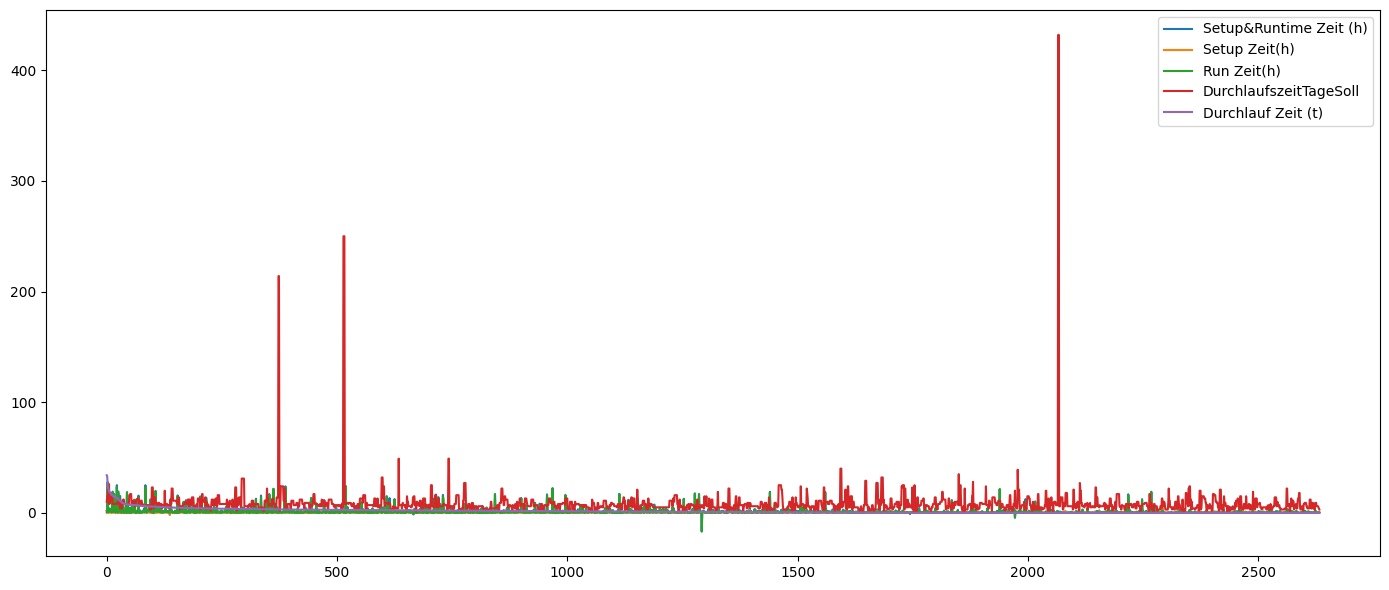

In [12]:
# 1.1 Ploten

df_real2 = pd.read_excel(excel_path_520)

cols = [
    'Setup&Runtime Zeit (h)',
    'Setup Zeit(h)',
    'Run Zeit(h)',
    'DurchlaufszeitTageSoll',
    'Durchlauf Zeit (t)'
]

df_real2[cols].plot(kind='line', figsize=(14,6), subplots=False)
plt.tight_layout()
plt.show()

In [46]:
# 1.2 Ausreiser entfernen
df_real2 = pd.read_excel(excel_path_520)
setup_runtime_mean2, setup_runtime_std2 = df_real2['Setup&Runtime Zeit (h)'].mean(), df_real2['Setup&Runtime Zeit (h)'].std(ddof=0)
setup_mean2, setup_std2 = df_real2['Setup Zeit(h)'].mean(), df_real2['Setup Zeit(h)'].std(ddof=0)
run_mean2, run_std2 = df_real2['Run Zeit(h)'].mean(), df_real2['Run Zeit(h)'].std(ddof=0)
leadTimeShould_mean2, leadTimeShould_std2 =  df_real2['DurchlaufszeitTageSoll'].mean(), df_real2['DurchlaufszeitTageSoll'].std(ddof=0)
leadTimeIs_mean2, leadTimeIs_std2 =  df_real2['Durchlauf Zeit (t)'].mean(), df_real2['Durchlauf Zeit (t)'].std(ddof=0)


print("Paramater der realen Daten:")
print(f"Rüst&Bearbeitungszeit:  μ={setup_runtime_mean2:.3f}, σ={setup_runtime_std2:.3f}")
print(f"Rüstzeit:               μ={setup_mean2:.3f}, σ={setup_std2:.3f}")
print(f"Bearbeitungszeit:       μ={run_mean2:.3f}, σ={run_std2:.3f}")
print(f"DurchlaufzeitSoll:      μ={leadTimeShould_mean2:.3f}, σ={leadTimeShould_std2:.3f}")
print(f"DurchlaufzeitIst:       μ={leadTimeIs_mean2:.3f}, σ={leadTimeIs_std2:.3f}")
print(f"Puffer:                 μ={leadTimeShould_mean2 - leadTimeIs_mean2:.3f}, σ={np.sqrt(leadTimeShould_std2**2 + leadTimeIs_std2**2):.3f}")

# Ursprüngliches DataFrame
df_real2_2 = df_real2.copy()

# Entferne alle negativen Run-Zeiten
df_real2_2 = df_real2_2[df_real2_2['Run Zeit(h)'] >= 0]

# 3. Entferne alle Durchlauf-Soll-Werte oberhalb eines vernünftigen Maximals, alles über 30 Tage ist zwar möglich aber ist mit experten abgesprochen so in Ordnung
df_real2_2 = df_real2_2[df_real2_2['DurchlaufszeitTageSoll'] <= 30]

setup_runtime_mean2, setup_runtime_std2 = df_real2_2['Setup&Runtime Zeit (h)'].mean(), df_real2_2['Setup&Runtime Zeit (h)'].std(ddof=0)
setup_mean2, setup_std2 = df_real2_2['Setup Zeit(h)'].mean(), df_real2_2['Setup Zeit(h)'].std(ddof=0)
run_mean2, run_std2 = df_real2_2['Run Zeit(h)'].mean(), df_real2_2['Run Zeit(h)'].std(ddof=0)
leadTimeShould_mean2, leadTimeShould_std2 =  df_real2_2['DurchlaufszeitTageSoll'].mean(), df_real2_2['DurchlaufszeitTageSoll'].std(ddof=0)
leadTimeIs_mean2, leadTimeIs_std2 =  df_real2_2['Durchlauf Zeit (t)'].mean(), df_real2_2['Durchlauf Zeit (t)'].std(ddof=0)


print("Paramater der realen Daten:")
print(f"Rüst&Bearbeitungszeit:  μ={setup_runtime_mean2:.3f}, σ={setup_runtime_std2:.3f}")
print(f"Rüstzeit:               μ={setup_mean2:.3f}, σ={setup_std2:.3f}")
print(f"Bearbeitungszeit:       μ={run_mean2:.3f}, σ={run_std2:.3f}")
print(f"DurchlaufzeitSoll:      μ={leadTimeShould_mean2:.3f}, σ={leadTimeShould_std2:.3f}")
print(f"DurchlaufzeitIst:       μ={leadTimeIs_mean2:.3f}, σ={leadTimeIs_std2:.3f}")
print(f"Puffer:                 μ={leadTimeShould_mean2 - leadTimeIs_mean2:.3f}, σ={np.sqrt(leadTimeShould_std2**2 + leadTimeIs_std2**2):.3f}")


Paramater der realen Daten:
Rüst&Bearbeitungszeit:  μ=1.487, σ=2.734
Rüstzeit:               μ=0.364, σ=0.341
Bearbeitungszeit:       μ=1.124, σ=2.634
DurchlaufzeitSoll:      μ=8.678, σ=16.215
DurchlaufzeitIst:       μ=1.542, σ=2.387
Puffer:                 μ=7.136, σ=16.390
Paramater der realen Daten:
Rüst&Bearbeitungszeit:  μ=1.501, σ=2.720
Rüstzeit:               μ=0.365, σ=0.336
Bearbeitungszeit:       μ=1.137, σ=2.621
DurchlaufzeitSoll:      μ=7.689, σ=4.641
DurchlaufzeitIst:       μ=1.539, σ=2.397
Puffer:                 μ=6.150, σ=5.223


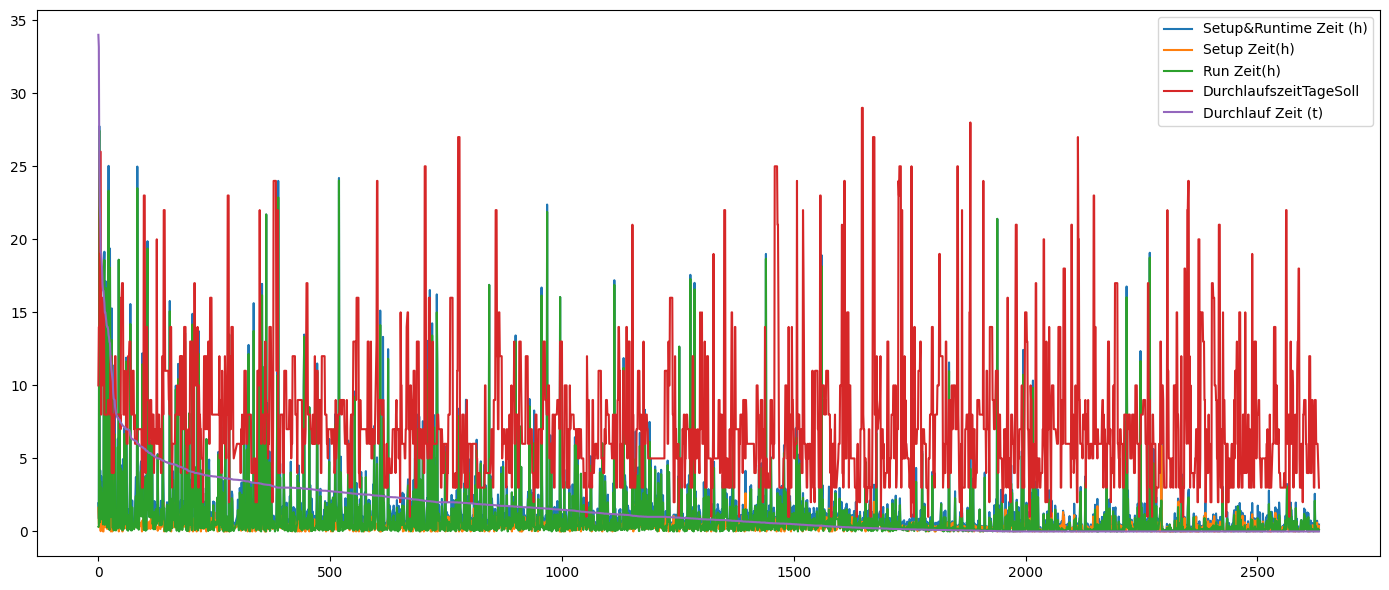

In [47]:
df_real2_2[cols].plot(kind='line', figsize=(14,6), subplots=False)
plt.tight_layout()
plt.show()

In [49]:
corr_matrix = df_real2_2[cols].corr()
cov_matrix  = df_real2_2[cols].cov()

print("Korrelationsmatrix:")
print(corr_matrix.round(3))
print("\nKovarianzmatrix:")
print(cov_matrix.round(3))

# 2.2 Mittelwerte extrahieren
means = df_real2_2[cols].mean().values

# 4) Synthetische Daten generieren (Beispiel: multivariate Normalverteilung)
N = 1000
synthetic = np.random.multivariate_normal(means, cov_matrix, size=N)

# In ein DataFrame packen und Spalten benennen:
df_synth = pd.DataFrame(synthetic, columns=cols)

# Kurz prüfen:
print("\nErste 5 Zeilen des synthetischen Datensatzes:")
print(df_synth.head(20))

Korrelationsmatrix:
                        Setup&Runtime Zeit (h)  Setup Zeit(h)  Run Zeit(h)  \
Setup&Runtime Zeit (h)                   1.000          0.350        0.993   
Setup Zeit(h)                            0.350          1.000        0.235   
Run Zeit(h)                              0.993          0.235        1.000   
DurchlaufszeitTageSoll                   0.018          0.034        0.014   
Durchlauf Zeit (t)                       0.277          0.171        0.265   

                        DurchlaufszeitTageSoll  Durchlauf Zeit (t)  
Setup&Runtime Zeit (h)                   0.018               0.277  
Setup Zeit(h)                            0.034               0.171  
Run Zeit(h)                              0.014               0.265  
DurchlaufszeitTageSoll                   1.000               0.148  
Durchlauf Zeit (t)                       0.148               1.000  

Kovarianzmatrix:
                        Setup&Runtime Zeit (h)  Setup Zeit(h)  Run Zeit(h)  \
S

In [ ]:
# 2. Sampling-Funktionen definieren
def sample_plan_rust_bearbeitung(n):
    return np.random.normal(loc=setup_runtime_mean, scale=setup_runtime_std, size=n).clip(min=0)

def sample_plan_material_bereitstellung(n):
    # Annahme: ähnliche Größenordnung wie Run-Zeit
    return np.random.normal(loc=run_mean, scale=run_std, size=n).clip(min=0)

def sample_material_verfugbarkeit(n):
    # Kategorien "Hoch", "Mittel", "Niedrig" mit willkürlichen Wahrscheinlichkeiten
    return np.random.choice(['Hoch', 'Mittel', 'Niedrig'], size=n, p=[0., 0.5, 0.2])

def sample_puffer(plan_mat, mat_verf):
    # Buffer anti-korreliert zu Availability: Hoch → kleiner Puffer, Niedrig → größerer Puffer
    p = np.zeros_like(plan_mat)
    mask_high = mat_verf == 'Hoch'
    mask_mid  = mat_verf == 'Mittel'
    mask_low  = mat_verf == 'Niedrig'
    p[mask_high] = np.random.uniform(0, 0.1 * plan_mat[mask_high])
    p[mask_mid]  = np.random.uniform(0.1, 0.2, size=mask_mid.sum()) * plan_mat[mask_mid]
    p[mask_low]  = np.random.uniform(0.2, 0.3, size=mask_low.sum()) * plan_mat[mask_low]
    return p

def sample_material_liegezeit(mat_verf):
    # Formel aus dem Schema übersetzt
    out = np.zeros(len(mat_verf))
    mask_high = mat_verf == 'Hoch'
    mask_mid  = mat_verf == 'Mittel'
    mask_low  = mat_verf == 'Niedrig'
    out[mask_high] = np.random.uniform(0.1, 0.5, size=mask_high.sum())
    out[mask_mid]  = np.random.uniform(0.5, 1.2, size=mask_mid.sum())
    out[mask_low]  = np.random.uniform(1.2, 3.0, size=mask_low.sum())
    return out

def sample_durchlaufzeit_soll(plan_rust, plan_mat, puffer):
    return plan_rust + plan_mat + puffer

def sample_durchlaufzeit_ist(plan_rust, plan_mat, mat_lieg):
    # tatsächliche Durchlaufzeit = Rüst+Bearbeitungszeit + Liegezeit
    return plan_rust + plan_mat + mat_lieg

def sample_arbeitsplatz_auslastung(plan_rust, plan_mat, mat_lieg):
    # Auslastung als Verhältnis der Ist-Durchlaufzeit zu einem 8h-Tag
    ist = plan_rust + plan_mat + mat_lieg
    return np.minimum(ist / 8, 1.0)

def sample_zeitraum_bis_liefertermin(durchlauf_soll, auslastung):
    # mehr Auslastung → größerer Vorlauf nötig
    return durchlauf_soll * (1 + auslastung)

def sample_termin_treue(durchlauf_ist, zeitraum_soll):
    # termintreu, wenn Ist-DZ <= vorgesehener Zeitraum bis Liefertermin
    return durchlauf_ist <= zeitraum_soll

def sample_liefertreue(termin_treue):
    # Liefertreue = TerminTreue
    return termin_treue.copy()

In [11]:
# 3. Daten generieren
n = 1000
np.random.seed(42)

plan_rust = sample_plan_rust_bearbeitung(n)
plan_mat  = sample_plan_material_bereitstellung(n)
mat_verf  = sample_material_verfugbarkeit(n)
puffer    = sample_puffer(plan_mat, mat_verf)
mat_lieg  = sample_material_liegezeit(mat_verf)

dz_soll = sample_durchlaufzeit_soll(plan_rust, plan_mat, puffer)
dz_ist  = sample_durchlaufzeit_ist(plan_rust, plan_mat, mat_lieg)
auslast  = sample_arbeitsplatz_auslastung(plan_rust, plan_mat, mat_lieg)
zeitraum = sample_zeitraum_bis_liefertermin(dz_soll, auslast)
termine  = sample_termin_treue(dz_ist, zeitraum)
liefer   = sample_liefertreue(termine)

In [13]:
# 4. DataFrame zusammenstellen und anzeigen
df_synth = pd.DataFrame({
    'plan_rust_bearbeitung_h': plan_rust,
    'plan_material_bereitstellung_h': plan_mat,
    'material_verfugbarkeit': mat_verf,
    'puffer_h': puffer,
    'material_liegezeit_h': mat_lieg,
    'durchlaufzeit_soll_h': dz_soll,
    'durchlaufzeit_ist_h': dz_ist,
    'arbeitsplatz_auslastung': auslast,
    'zeitraum_bis_liefertermin_h': zeitraum,
    'termin_treue': termine,
    'liefertreue': liefer
})

# In einem Jupyter-Notebook:

display(df_synth.head(30))

,plan_rust_bearbeitung_h,plan_material_bereitstellung_h,material_verfugbarkeit,puffer_h,material_liegezeit_h,durchlaufzeit_soll_h,durchlaufzeit_ist_h,arbeitsplatz_auslastung,zeitraum_bis_liefertermin_h,termin_treue,liefertreue
0,0.677569,0.797650,Mittel,0.100132,0.734352,1.575351,2.209571,0.276196,2.010457,False,False
1,0.326937,0.606096,Hoch,0.018330,0.367551,0.951363,1.300584,0.162573,1.106029,False,False
2,0.760936,0.257061,Mittel,0.028428,0.719592,1.046425,1.737589,0.217199,1.273707,False,False
3,1.244295,0.000000,Hoch,0.000000,0.419462,1.244295,1.663757,0.207970,1.503071,False,False
4,0.273987,0.514738,Niedrig,0.130801,2.159982,0.919526,2.948708,0.368589,1.258453,False,False
5,0.273996,0.391774,Niedrig,0.102061,1.930161,0.767831,2.595932,0.324492,1.016986,False,False
6,1.275319,0.594217,Hoch,0.047763,0.473101,1.917299,2.342637,0.292830,2.478742,True,True
7,0.827059,0.489296,Niedrig,0.108648,1.504491,1.425003,2.820847,0.352606,1.927468,False,False
8,0.144044,0.656502,Mittel,0.088949,0.944952,0.889496,1.745498,0.218187,1.083573,False,False
9,0.702885,0.017029,Hoch,0.000234,0.108055,0.720147,0.827968,0.103496,0.794679,False,False
